In [ ]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
cases_df = pd.read_csv(io.BytesIO(uploaded['INTC.csv']))

Saving INTC.csv to INTC.csv


In [ ]:
from google.colab import drive
drive.mount ('/gdrive')
%cd /gdrive/MyDrive/dataset/
%ls

Mounted at /gdrive
/gdrive/MyDrive/dataset
ads.csv                 currency.csv             mobkas-train.csv
asuransi-nan-asli.csv   data.csv                 noise-car.xlsx
asuransi-nan-tanya.csv  house_prediction.csv     Pokemon.csv
asuransi-tanya.csv      INTC.csv                 Salary_Data.csv
audi.csv                Iris.csv                 titanic-noise-test.csv
Automobile.csv          Mall_Customers.csv       titanic-noise-train.csv
avocado.csv             mobkas-pred.csv          titanic-pred.csv
cases.csv               mobkas-pred-nugroho.csv
covid19.csv             mobkas-test.csv


In [ ]:
cases_df = pd.read_csv('INTC.csv')

In [ ]:
cases_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.202750,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.201952,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.194767,12172800
...,...,...,...,...,...,...,...
10356,2021-04-13,65.610001,65.629997,64.209999,65.220001,65.220001,26822000
10357,2021-04-14,65.309998,65.379997,63.840000,64.190002,64.190002,25768400
10358,2021-04-15,63.970001,65.220001,63.680000,65.019997,65.019997,24927700
10359,2021-04-16,65.330002,65.519997,64.570000,64.750000,64.750000,24607000


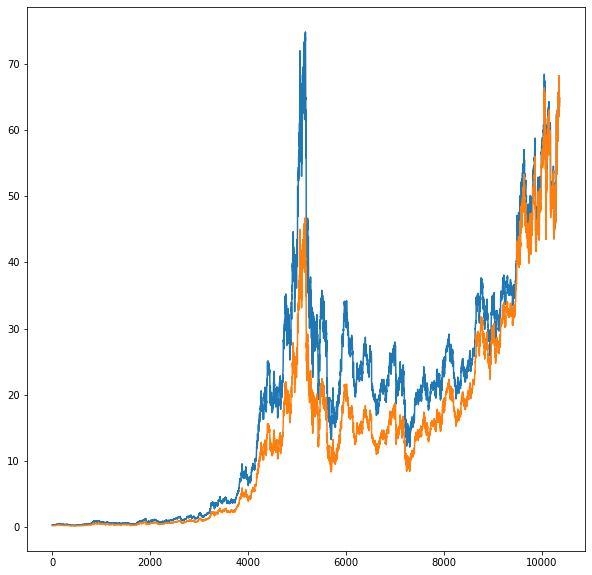

In [ ]:
plt.figure(figsize=(10,10))
#plt.plot(cases_df['Date'], cases_df['Adj Close'])
plt.plot(cases_df['Close'])
plt.plot(cases_df['Adj Close'])
#plt.plot(cases_df['new_confirmed'])

In [ ]:
cases_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.202750,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.201952,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.194767,12172800
...,...,...,...,...,...,...,...
10356,2021-04-13,65.610001,65.629997,64.209999,65.220001,65.220001,26822000
10357,2021-04-14,65.309998,65.379997,63.840000,64.190002,64.190002,25768400
10358,2021-04-15,63.970001,65.220001,63.680000,65.019997,65.019997,24927700
10359,2021-04-16,65.330002,65.519997,64.570000,64.750000,64.750000,24607000


In [ ]:
cases_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800


In [ ]:
cases_df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
10359,2021-04-16,65.330002,65.519997,64.57,64.750000,64.750000,24607000
10360,2021-04-19,64.699997,64.739998,63.07,63.630001,63.630001,23990400


In [ ]:
kolom=len(cases_df.columns)
print(kolom)
for i in range (0, kolom):
  cases_df=cases_df[cases_df.iloc[:,i]!='?']
  cases_df=cases_df[cases_df.iloc[:,i]!='']
  cases_df=cases_df[~cases_df.iloc[:,i].isna()]
cases_df.info()

17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                28 non-null     object 
 1   new_tested          28 non-null     float64
 2   acc_tested          28 non-null     int64  
 3   new_confirmed       28 non-null     int64  
 4   acc_confirmed       28 non-null     int64  
 5   acc_negative        28 non-null     int64  
 6   being_checked       28 non-null     int64  
 7   isolated            28 non-null     int64  
 8   new_released        28 non-null     int64  
 9   acc_released        28 non-null     int64  
 10  new_deceased        28 non-null     int64  
 11  acc_deceased        28 non-null     int64  
 12  positive_rate       28 non-null     object 
 13  negative_rate       28 non-null     object 
 14  decease_rate        28 non-null     object 
 15  release_rate        28 non-null     object 
 16  dailypo

In [ ]:
#cases_df_sort=cases_df.sort_values('date')

In [ ]:
#plt.figure(figsize=(10,10))
#plt.plot(cases_df_sort['date'], cases_df_sort['new_confirmed'])

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


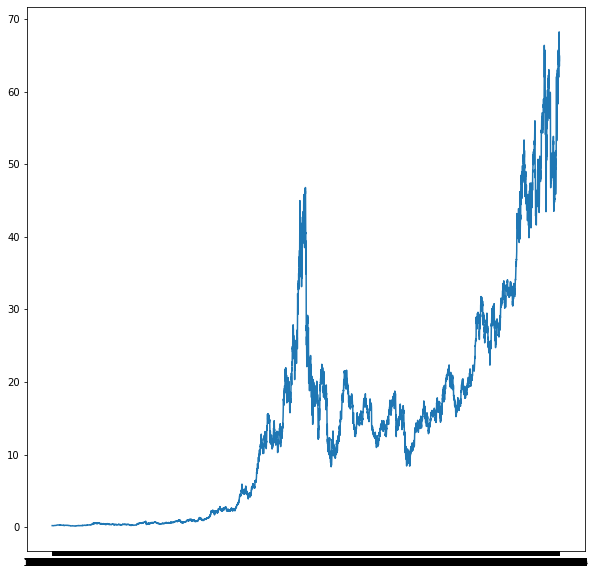

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(cases_df['Date'], cases_df['Adj Close'])

In [ ]:
cases_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.202750,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.201952,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.194767,12172800
...,...,...,...,...,...,...,...
10356,2021-04-13,65.610001,65.629997,64.209999,65.220001,65.220001,26822000
10357,2021-04-14,65.309998,65.379997,63.840000,64.190002,64.190002,25768400
10358,2021-04-15,63.970001,65.220001,63.680000,65.019997,65.019997,24927700
10359,2021-04-16,65.330002,65.519997,64.570000,64.750000,64.750000,24607000


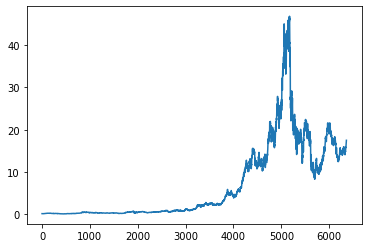

In [ ]:
cases_prophet_df = cases_df[['Date', 'Adj Close']]
cases_prophet_df = cases_prophet_df.rename(columns={'Date':'ds', 'Adj Close':'y'})
cases_prophet_df=cases_prophet_df.iloc[:-4000,:]
plt.plot(cases_prophet_df["y"])

In [ ]:
#model_params = {"interval_width"=0.95,"daily_seasonality": False, "weekly_seasonality": False, "yearly_seasonality": True, "seasonality_mode": "multiplicative", "growth": "logistic"}
model_params = {"growth":"logistic"}
#m = Prophet(model_params)

#m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m = Prophet(growth="linear")
m.fit(cases_prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


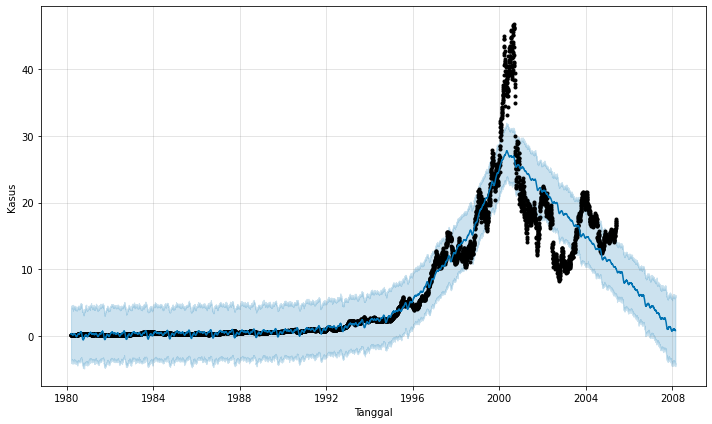

In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=1000)
forecast = m.predict(future)

forecast

figure = m.plot(forecast, xlabel='Tanggal', ylabel='Kasus')

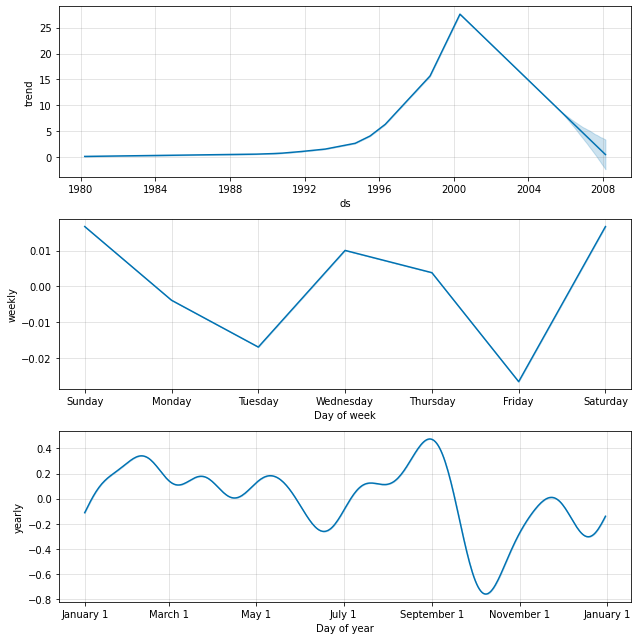

In [ ]:
figure3 = m.plot_components(forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-03-17,0.156189,-3.649926,3.989677,0.156189,0.156189,0.037854,0.037854,0.037854,0.037854,0.037854,0.037854,0.0,0.0,0.0,0.194043
1,1980-03-18,0.156314,-3.309228,3.981812,0.156314,0.156314,0.046088,0.046088,0.046088,0.046088,0.046088,0.046088,0.0,0.0,0.0,0.202402
2,1980-03-19,0.156438,-3.590929,4.107122,0.156438,0.156438,0.055989,0.055989,0.055989,0.055989,0.055989,0.055989,0.0,0.0,0.0,0.212427
3,1980-03-20,0.156563,-3.430874,4.249957,0.156563,0.156563,0.067352,0.067352,0.067352,0.067352,0.067352,0.067352,0.0,0.0,0.0,0.223915
4,1980-03-21,0.156687,-3.869274,4.236120,0.156687,0.156687,0.079961,0.079961,0.079961,0.079961,0.079961,0.079961,0.0,0.0,0.0,0.236648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,2021-04-14,57.282031,53.791108,61.463525,57.282031,57.282031,0.360073,0.360073,0.360073,0.360073,0.360073,0.360073,0.0,0.0,0.0,57.642104
10358,2021-04-15,57.295692,53.647071,61.559167,57.295692,57.295692,0.365497,0.365497,0.365497,0.365497,0.365497,0.365497,0.0,0.0,0.0,57.661189
10359,2021-04-16,57.309353,53.709523,61.263180,57.309353,57.309353,0.370334,0.370334,0.370334,0.370334,0.370334,0.370334,0.0,0.0,0.0,57.679687
10360,2021-04-19,57.350337,54.007334,61.460077,57.350337,57.350337,0.380748,0.380748,0.380748,0.380748,0.380748,0.380748,0.0,0.0,0.0,57.731085


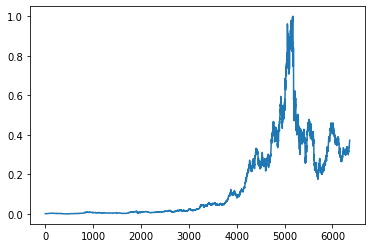

In [ ]:
x=np.array(cases_prophet_df['y'])
x=x.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(x)
plt.plot(scaled_y)
plt.show()

In [ ]:
scaled_y=np.array(cases_prophet_df['y']).astype('float')

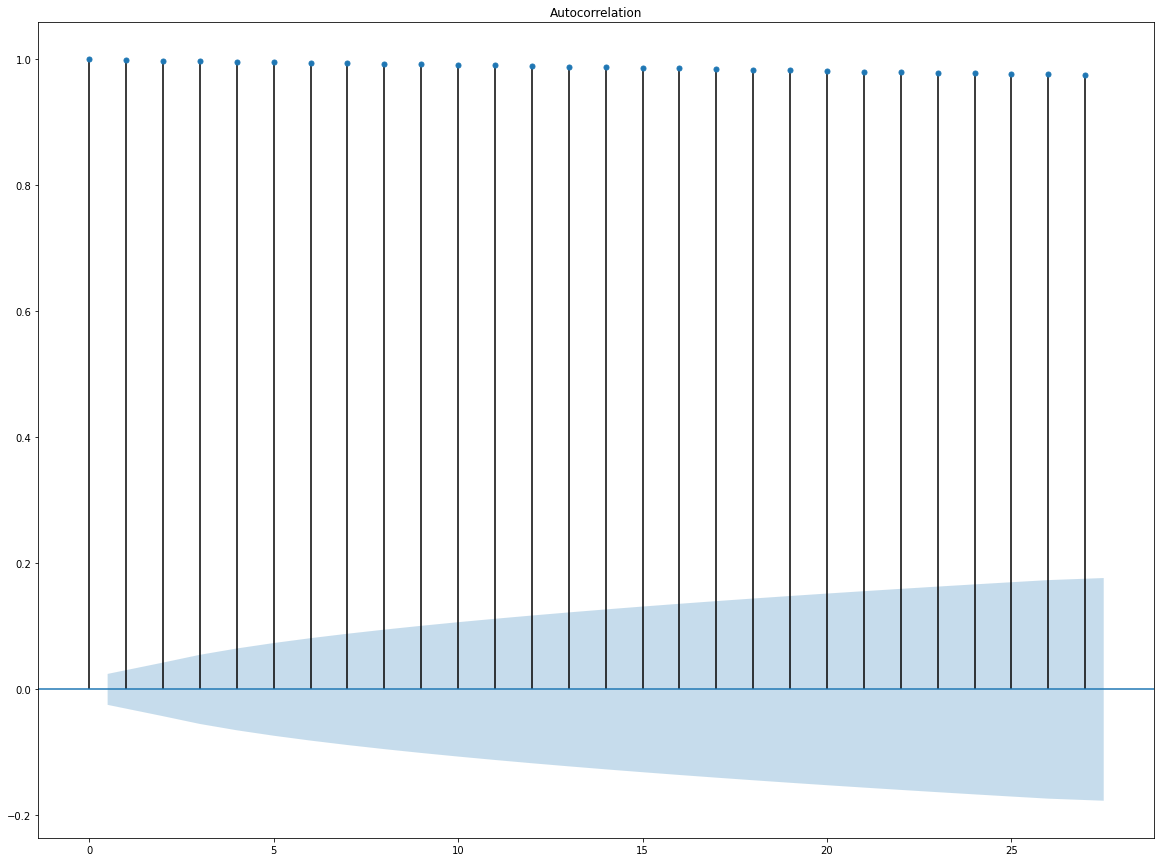

In [ ]:
scaled_y.shape

fig,ax = plt.subplots(figsize=(20,15)) # acf/pacf plot
sm.graphics.tsa.plot_acf(scaled_y,lags=27,ax=ax);

In [ ]:
# create function of timewindow
def timewindow(y, window):
    obs  = len(y)-window
    yt   = y[:obs,:]
    for i in np.arange(1,window+1):
        yt = np.hstack((yt, y[i:obs+i,:]))
    return yt
scaled_data = timewindow(scaled_y,1)

In [ ]:
scaled_data

array([[0.00143661, 0.00140241],
       [0.00140241, 0.00150502],
       [0.00150502, 0.00148791],
       ...,
       [0.36050207, 0.36680918],
       [0.36680918, 0.36735769],
       [0.36735769, 0.37243072]])

In [ ]:
n_data,n_var = scaled_data.shape
n_data,n_var

n_test = int(0.2*n_data)
n_test

1272

In [ ]:
X_scaled_train = scaled_data[:-n_test,:-1]
y_scaled_train = scaled_data[:-n_test,-1]

X_scaled_test = scaled_data[-n_test:,:-1]
y_scaled_test = scaled_data[-n_test:,-1]

In [ ]:
X_scaled_test

array([[0.79424124],
       [0.79758899],
       [0.82311191],
       ...,
       [0.36050207],
       [0.36680918],
       [0.36735769]])

In [ ]:
# reshape X_train and X_test to ndim = 3
X_scaled_train = np.reshape(X_scaled_train, (X_scaled_train.shape[0], 1, X_scaled_train.shape[1]))
X_scaled_test  = np.reshape(X_scaled_test,  (X_scaled_test.shape[0], 1, X_scaled_test.shape[1]))

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.LSTM(4, input_shape=(1,1)),
                                    tf.keras.layers.Dense(1),])

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-04)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 96        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_mae = 0.005 ; # 0.5% from scaled data

class StopCond(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<max_mae):
            print("MAE threshold condition has been satisfied.")
            self.model.stop_training = True


early_stopping    = StopCond()

In [ ]:
start_time = time.time()
history = model.fit(X_scaled_train,y_scaled_train,epochs=100,batch_size = 1,callbacks = [early_stopping])

Epoch 1/100
5088/5088 [==============================] - 14s 2ms/step - loss: 0.0088 - mae: 0.0871
Epoch 2/100
5088/5088 [==============================] - 12s 2ms/step - loss: 0.0026 - mae: 0.0459
Epoch 3/100
5088/5088 [==============================] - 11s 2ms/step - loss: 1.1542e-04 - mae: 0.0059
Epoch 4/100
5088/5088 [==============================] - 11s 2ms/step - loss: 3.2540e-05 - mae: 0.0034


In [ ]:
end_time = time.time()
durasi = (end_time - start_time)/60

print("Time elapsed to train model :",durasi,"minutes.")

Time elapsed to train model : 0.06403257052103678 minutes.


In [ ]:
y_scaled_test_predict = model.predict(X_scaled_test)

mae = mean_absolute_error(y_scaled_test_predict,y_scaled_test)
print("MAE : " + str(mae) + " --> " + str(round(mae,3)*100) + "% of scaled data.")

UnimplementedError: ignored

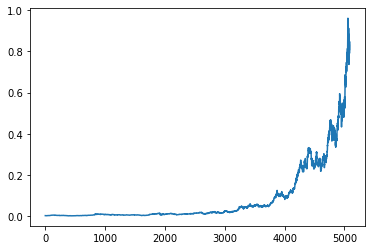

In [ ]:
plt.plot(y_scaled_train, label = 'Actual Serries')

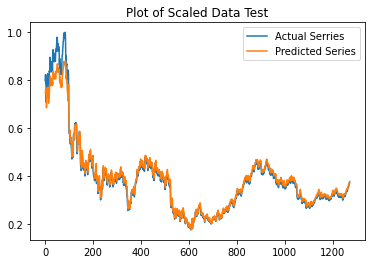

In [ ]:
plt.plot(y_scaled_test, label = 'Actual Serries')
plt.plot(y_scaled_test_predict, label = 'Predicted Series')
plt.title('Plot of Scaled Data Test')
plt.legend()
plt.show()

In [ ]:
print(y_scaled_test)
print(y_scaled_test_predict)

[0.79758899 0.82311191 0.78461784 ... 0.36680918 0.36735769 0.37243072]
[[0.74883693]
 [0.75119966]
 [0.76895046]
 ...
 [0.37055248]
 [0.37698904]
 [0.3775479 ]]
